In [3]:
import warnings
warnings.filterwarnings('ignore')

# 판다스 내장 그래프 도구
* 판다스는 Matplotlib 라이브러리의 기능을 일부 내장하고 있어서 별도로 임포드하지 않고 간단히 그래프 그릴 수 있음.
* 선그래프 : df.plot()메소드 적용시 다른 옵션을 추가하지 않으면 가장 기본적인 선 그래프를 그림.
* 막대 그래프 : df.plot(kind='bar'), df.plot(kind='barh',stacked=True,alpha=0.8)
* 히스토그램 : df.plot(kind='hist')
* 산점도 : df.plot(x=' ', y=' ', kind='scatter'), 상관관계를 볼 수 있음.
* 박스 플롯 : df.plot(kind='box'), df.boxplot(column=['feature']) 특정 변수의 데이터 분포와 분산 정도에 대한 정보를 제공.

In [4]:
import pandas as pd
import numpy as np

df = pd.read_csv('dataset/주가데이터.csv')
df.head()

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [5]:
df['NDate'] = pd.to_datetime(df.Date)
df1 = df.set_index('NDate')
df1.drop(['Date','Volume'], axis=1, inplace=True)
df1.head()

,Close,Start,High,Low
NDate,,,,
2018-07-02,10100,10850,10900,10000
2018-06-29,10700,10550,10900,9990
2018-06-28,10400,10900,10950,10150
2018-06-27,10900,10800,11050,10500
2018-06-26,10800,10900,11000,10700


## (df | sr).plot() 

### kind = 'line' (default)

<AxesSubplot:xlabel='NDate'>

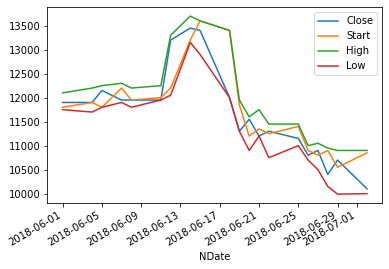

In [6]:
df1.plot()

<AxesSubplot:xlabel='NDate'>

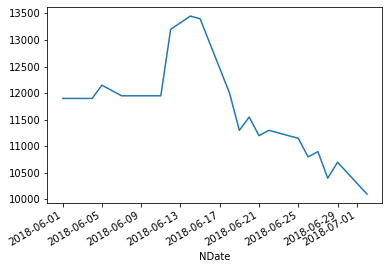

In [7]:
df1.Close.plot()

<AxesSubplot:xlabel='NDate'>

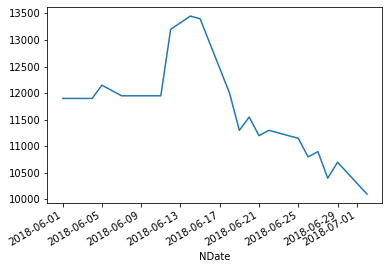

In [8]:
df1.Close[::-1].plot()
# 왜 이걸 굳이 역순으로 했지 어차피 찍히는 포인트는 다 똑같은데??

### kind = 'bar'

<AxesSubplot:xlabel='NDate'>

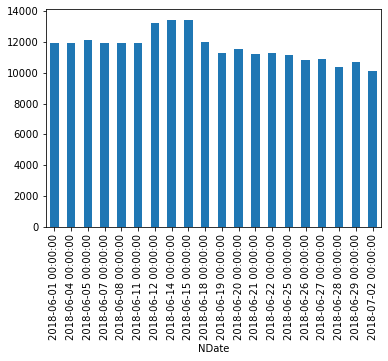

In [9]:
# 막대 그래프
df1.Close[::-1].plot(kind='bar') # bar graph일때는 축 방향이 바뀐다. 

<AxesSubplot:xlabel='NDate'>

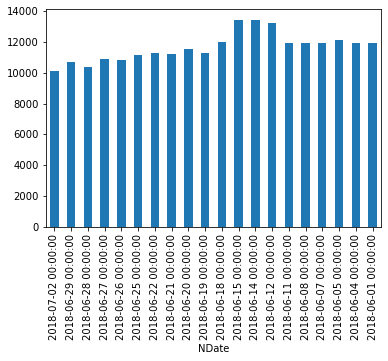

In [10]:
# 막대 그래프
df1.Close.plot(kind='bar')

<AxesSubplot:xlabel='NDate'>

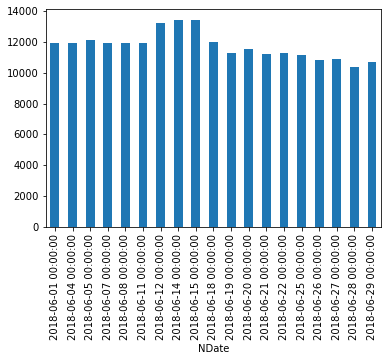

In [11]:
# Q. 6월만을 추출하여 Close 컬럼으로 일별 막대 그래프를 표현하세요.

# df1.Close.loc['2018-06'][::-1].plot(kind='bar')
df1.loc['2018-06','Close'][::-1].plot(kind='bar')

<AxesSubplot:xlabel='NDate'>

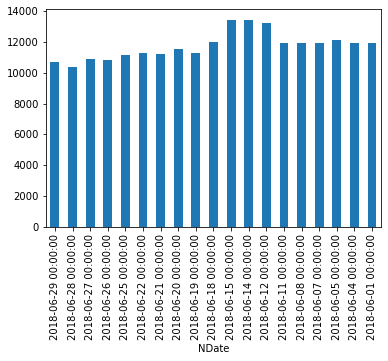

In [12]:
df1.loc['2018-06','Close'].plot(kind='bar')

### kind = 'hist'

<AxesSubplot:ylabel='Frequency'>

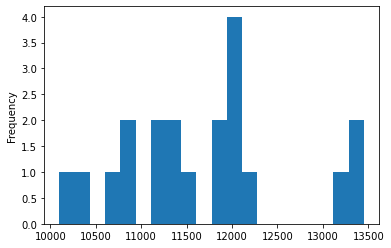

In [13]:
df1.Close.plot(kind='hist', bins=20) # min ~ max 사이를 bin 등분 한 듯

#### (Done) 과제 #3 Wed 0706

- df에서 Volume 컬럼의 분포를 탐색하는 히스토그램을 표현하세요.

<AxesSubplot:ylabel='Frequency'>

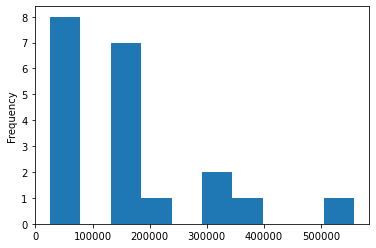

In [14]:
df.Volume.plot(kind = 'hist', bins=10)

### kind = 'scatter'

<AxesSubplot:xlabel='Close', ylabel='Volume'>

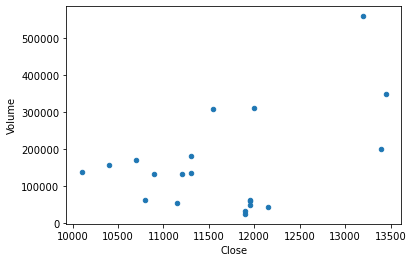

In [15]:
df.plot(x='Close', y='Volume', kind='scatter'  )

#### Correlation

In [16]:
df1.corr() # Correlation 상관관계

,Close,Start,High,Low
Close,1.000000,0.856181,0.941201,0.946297
Start,0.856181,1.000000,0.961009,0.921467
High,0.941201,0.961009,1.000000,0.945487
Low,0.946297,0.921467,0.945487,1.000000


### kind = 'box'

In [17]:
df1.Close.describe()

count       20.000000
mean     11662.500000
std        927.060294
min      10100.000000
25%      11087.500000
50%      11725.000000
75%      11962.500000
max      13450.000000
Name: Close, dtype: float64

<AxesSubplot:>

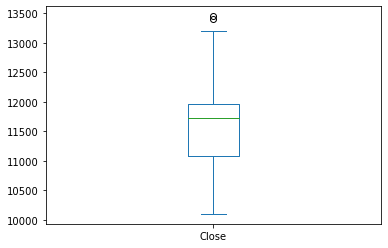

In [18]:
df1.Close.plot(kind='box') #min, first quartile, median, third quartile, max

<AxesSubplot:>

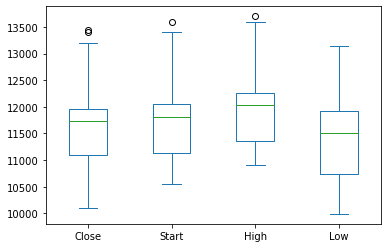

In [19]:
df1.plot(kind='box') #min, first quartile, median, third quartile, max

#### Box plot 의미 해석

* IQR(Inter Quartile Range): 제 3사분위수 - 제1사분위수
* lower whisker: Q1 - 1.5 x IQR 이내인 값중에서 최솟값
* upper whisker: Q3 + 1.5 x IQR 이내인 값중에서 최댓값
* 이상치: lower whisker, upper whisker를 벗어나는 값


In [20]:
df.Close.describe()

count       20.000000
mean     11662.500000
std        927.060294
min      10100.000000
25%      11087.500000
50%      11725.000000
75%      11962.500000
max      13450.000000
Name: Close, dtype: float64

<AxesSubplot:>

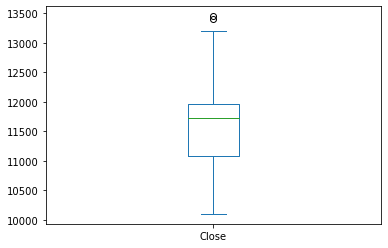

In [21]:
df1.Close.plot(kind='box') 
#lower whisker, first quartile, median, third quartile, upper whisker

In [22]:
Q1 = df.Close.describe()['25%']
Q3 = df.Close.describe()['75%']
IQR = Q3 - Q1
abv = df[(df.Close <= (Q1 - IQR*1.5)) | ((df.Close >= (Q3 + IQR*1.5)))]

Q1, Q3, IQR

(11087.5, 11962.5, 875.0)

In [23]:
abv

,Date,Close,Start,High,Low,Volume,NDate
11,2018-06-15,13400,13600,13600,12900,201376,2018-06-15
12,2018-06-14,13450,13200,13700,13150,347451,2018-06-14


#### (D) 과제 Thu #1 0707
- Start 컬럼의 분포 및 이상치 여부를 탐색하는 Box Plot 및 이상치를 구하세요

In [24]:
df.Start.describe()

count       20.000000
mean     11755.000000
std        865.250192
min      10550.000000
25%      11125.000000
50%      11800.000000
75%      12050.000000
max      13600.000000
Name: Start, dtype: float64

<AxesSubplot:>

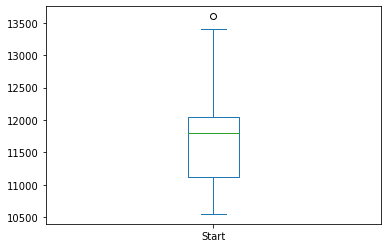

In [25]:
df1.Start.plot(kind='box') 
#lower whisker, first quartile, median, third quartile, upper whisker

In [26]:
Q1 = df.Start.describe()['25%']
Q3 = df.Start.describe()['75%']
IQR = Q3 - Q1
abv = df[(df.Start <= (Q1 - IQR*1.5)) | ((df.Start >= (Q3 + IQR*1.5)))]

Q1, Q3, IQR

(11125.0, 12050.0, 925.0)

In [27]:
abv

,Date,Close,Start,High,Low,Volume,NDate
11,2018-06-15,13400,13600,13600,12900,201376,2018-06-15


#### (D) 과제 Thu #2 0707

In [28]:
df_auto = pd.read_excel('../pandas/dataset/auto-mpg.xlsx')
# ./ 현재폴더 ../상위 폴더

df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [29]:
df_auto.mpg.describe()

count    398.000000
mean      23.514573
std        7.815984
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

In [30]:
Q1 = df_auto.mpg.describe()['25%']
Q3 = df_auto.mpg.describe()['75%']
IQR = Q3 - Q1

Q1, Q3, IQR

(17.5, 29.0, 11.5)

<AxesSubplot:>

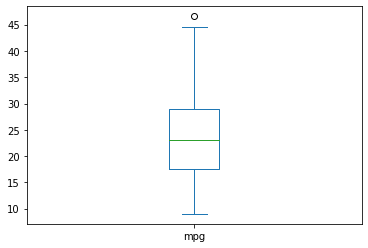

In [31]:
lower_w = Q1 - 1.5*IQR
upper_w = Q3 +1.5*IQR

df_auto.mpg.plot(kind='box')

In [32]:
df_auto[(df_auto.mpg <= lower_w)|(df_auto.mpg >= upper_w)].head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
322,46.6,4,86.0,65,2110,17.9,80,3,mazda glc


# seaborn
- sns.distplot(data, bins=, color=, kde=), histplot, displot으로 변경
- sns.boxplot(x, y, data, color)
- sns.violinplot(x, y, data, color)
- sns.barplot(x, y, data, color)
- sns.jointplot(x, y, data, color)
- sns.pairplot(data, hue, palette)
- sns.lmplot(x,y,data,color)
- sns.regplot(x,y,data,fig_reg=False)

In [33]:
import seaborn as sns

In [141]:
fish_multi = pd.read_csv('./dataset/4_fm2.csv')
fish_multi.head()

,species,length
0,A,2
1,A,3
2,A,3
3,A,4
4,A,4


<AxesSubplot:xlabel='species', ylabel='length'>

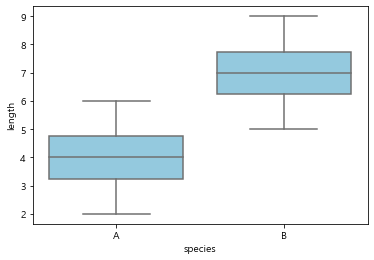

In [142]:
sns.boxplot(x = 'species', y = 'length', data=fish_multi, color = 'skyblue')

In [143]:
fish_multi.groupby('species').describe()

length                                          
         count mean       std  min   25%  50%   75%  max
species                                                 
A         10.0  4.0  1.154701  2.0  3.25  4.0  4.75  6.0
B         10.0  7.0  1.154701  5.0  6.25  7.0  7.75  9.0

In [144]:
fish_multi.iloc[5, 1] = 10
fish_multi.iloc[10,1] = 2

In [145]:
fish_multi.describe()

,length
count,20.000000
mean,5.650000
std,2.277464
min,2.000000
25%,4.000000
50%,6.000000
75%,7.000000
max,10.000000


In [146]:
fish_multi.head()

,species,length
0,A,2
1,A,3
2,A,3
3,A,4
4,A,4


<AxesSubplot:xlabel='species', ylabel='length'>

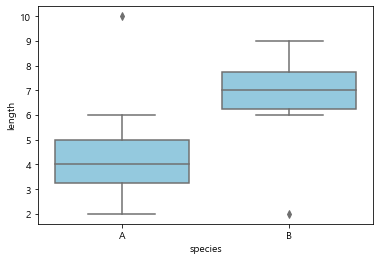

In [147]:
sns.boxplot(x = 'species', y = 'length', data=fish_multi, color = 'skyblue')

In [41]:
# 평균 0, 표준편차 1인 표준정규분포 난수 10000개로 데이터프레임을 생성

In [42]:
df_num = pd.DataFrame(np.random.randn(100000000), columns=['Num'])
df_num.head()

,Num
0,-0.704321
1,1.015070
2,-2.231942
3,1.180587
4,0.317561


<AxesSubplot:ylabel='Frequency'>

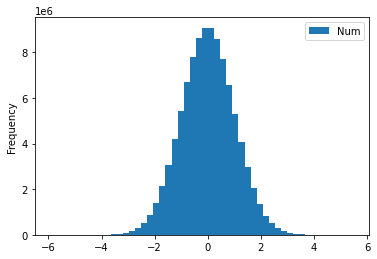

In [43]:
df_num.plot(kind='hist', bins=50)

In [44]:
# 평균 10, 표준편차 2, 샘플 10000
from scipy import stats

np.random.seed(1)
sample1 = stats.norm.rvs(loc=10, scale=2, size=10000000)

sample1, type(sample1)

(array([13.24869073,  8.77648717,  8.9436565 , ...,  9.68919407,
         8.58790176,  8.60458449]),
 numpy.ndarray)

In [45]:
df1 = pd.DataFrame(sample1, columns=['Num'])
df1.head()

,Num
0,13.248691
1,8.776487
2,8.943656
3,7.854063
4,11.730815


<AxesSubplot:ylabel='Frequency'>

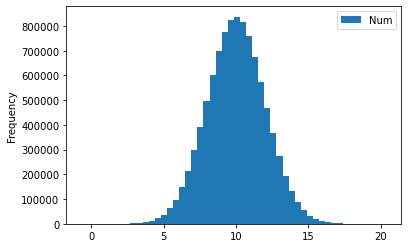

In [46]:
df1.plot(kind='hist', bins=50)

# matplotlib
- histogram : plt.hist(x, bins= )
- line plot : plt.plot(x,y)
- plt.bar(x,y, width= , color='')
- scatter plot : plt.scatter(x, y): 

## line plot

In [164]:
import matplotlib.pyplot as plt
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [167]:
plt.style.use('ggplot')

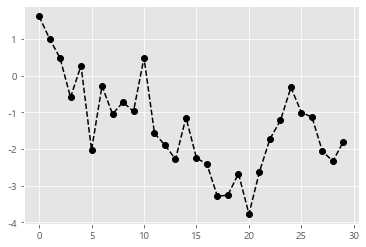

In [168]:
import matplotlib.pyplot as plt
from numpy.random import randn

np.random.seed(1)
plt.plot(randn(30).cumsum(), linestyle='dashed',
         color = 'k', marker = 'o') 

In [48]:
# ndarray.cumsum() 누적 cumulative
np.array([1, 2, 3, 4, 5]).cumsum() 

array([ 1,  3,  6, 10, 15])

In [49]:
data = randn(1000)
#data = data.round()
print(data[:10])

cdata = data.cumsum()
cdata[:10]

[-0.69166075 -0.39675353 -0.6871727  -0.84520564 -0.67124613 -0.0126646
 -1.11731035  0.2344157   1.65980218  0.74204416]


array([-0.69166075, -1.08841428, -1.77558698, -2.62079262, -3.29203875,
       -3.30470335, -4.4220137 , -4.187598  , -2.52779582, -1.78575166])

In [50]:
# ndarray.round() round를 각 원소에 적용

Text(0.5, 0, 'Stages')

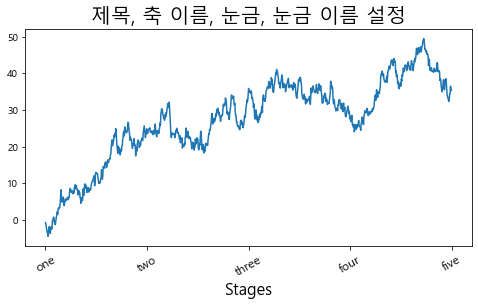

In [51]:

#========= 폰트 설정========#
from matplotlib import font_manager, rc

font_path = './dataset/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family = font_name)
plt.rcParams['axes.unicode_minus'] = False
#========= =============#


fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(1, 1, 1)
ax.plot(cdata)
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                           rotation=30, fontsize = 12)

ax.set_title('제목, 축 이름, 눈금, 눈금 이름 설정', fontsize= 20)
ax.set_xlabel('Stages', fontsize=16)

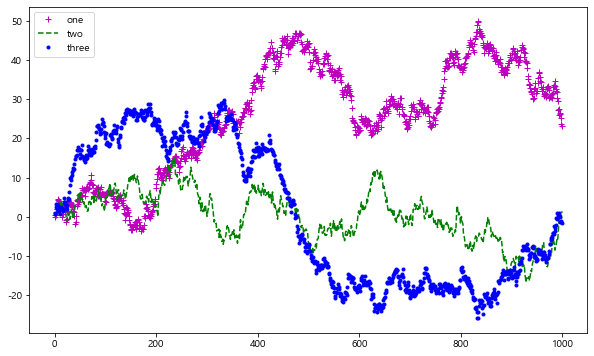

In [52]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'm+', label='one')
ax.plot(randn(1000).cumsum(), 'g--', label='two')
ax.plot(randn(1000).cumsum(), 'b.', label='three')

plt.legend(loc='best')

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

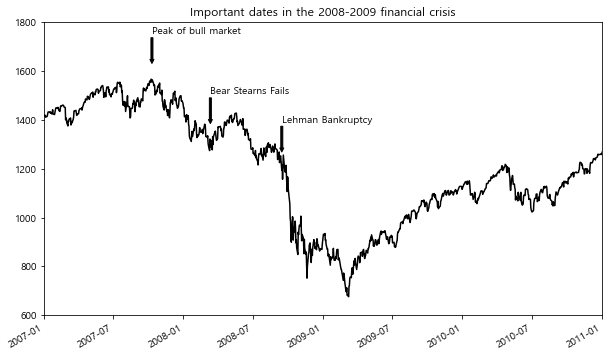

In [53]:
# 주석과 글자는 text, arrow, annotate 함수를 이용하여 추가

from datetime import datetime

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('./dataset/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2,
                                headlength=4),
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')


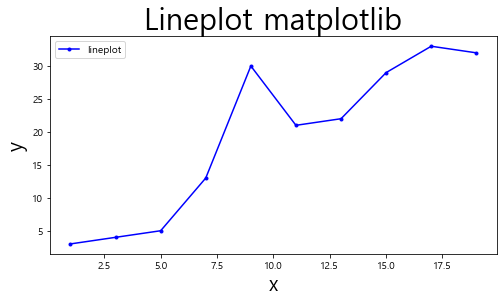

In [54]:
x = np.arange(1, 21, 2)
y = np.array([3, 4, 5, 13, 30, 21, 22, 29, 33, 32])

plt.figure(figsize=(8, 4))
plt.plot(x, y, color='blue', marker = 'o', markersize =3) # 'bo'
plt.title('Lineplot matplotlib', fontsize = 30)
plt.xlabel('x', size=20)
plt.ylabel('y', size=20)
plt.legend(labels=['lineplot'])

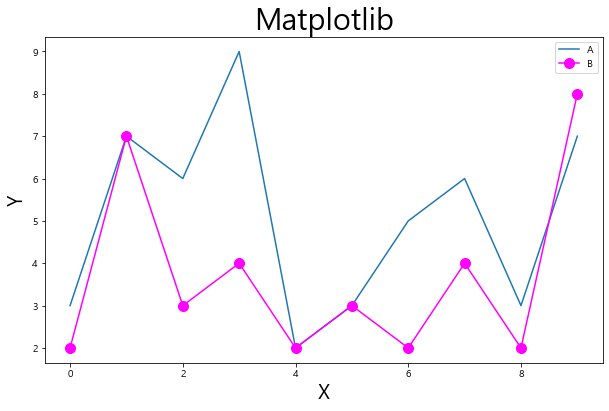

In [55]:
np.random.seed(10)
x = np.arange(10)
y1 = np.random.randint(2, 10, size=10)
y2 = np.random.randint(2, 10, size=10)
plt.figure(figsize=(10, 6))
plt.plot(x, y1)
plt.plot(x, y2, color='magenta', marker='o', markersize=10)

plt.title('Matplotlib', fontsize = 30)
plt.xlabel('X', size=20)
plt.ylabel('Y', size=20)
plt.legend(labels=['A', 'B'])

## bar plot

In [56]:
import matplotlib

Text(0.5, 1.0, 'Bar Plot')

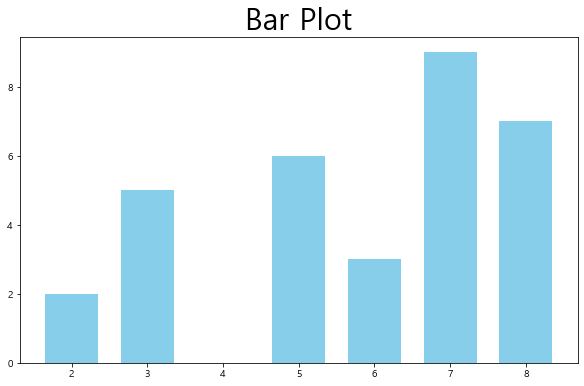

In [66]:
x = np.random.randint(2, 10, size=10)
y = range(len(y))

plt.figure(figsize=(10, 6))
plt.bar(x, y, width=0.7, color='skyblue')
plt.title('Bar Plot', size=30)

In [65]:
# plt.title 이 str 으로 잡힐때는 kernel을 재시작

## barh 수평막대

<AxesSubplot:>

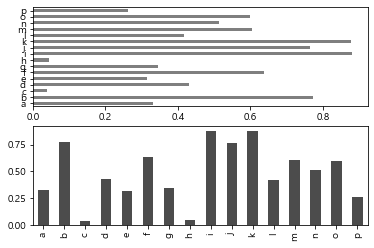

In [71]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
# print(data)

data.plot.bar(ax=axes[1], color='k', alpha=0.7)
data.plot.barh(ax = axes[0], color='k', alpha=0.5)

In [72]:
axes

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

# 뭐라해

## df plot.bar 그룹별 막대그래프

각 raw의 값을 묶어서 그룹별 막대그래프로 표현

              A         B         C         D
one    0.384031  0.257303  0.829402  0.736383
two    0.507601  0.644327  0.213187  0.895709
three  0.965946  0.317002  0.865553  0.310284
four   0.025264  0.049195  0.184627  0.069033
five   0.257475  0.913582  0.457850  0.130212
six    0.809892  0.403470  0.024433  0.856831


<AxesSubplot:>

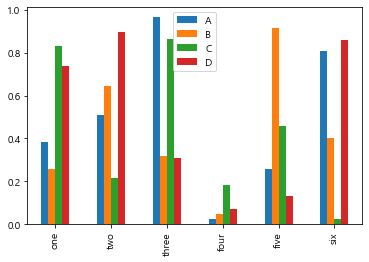

In [80]:
df = pd.DataFrame(np.random.rand(6, 4),
                 index=['one', 'two', 'three', 'four', 'five', 'six'],
                 columns = ['A', 'B', 'C', 'D'])
print(df)
df.plot.bar()

## df plot.barh 누적막대그래프

<AxesSubplot:>

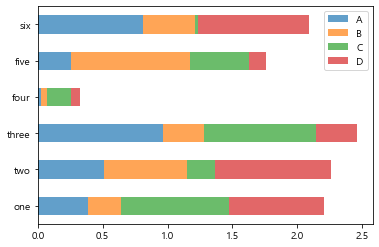

In [81]:
df.plot.barh(stacked=True, alpha=0.7)

In [83]:
type(df.plot)

pandas.plotting._core.PlotAccessor

## plt scatter plot

In [85]:
df_auto = pd.read_csv('../pandas/dataset/auto-mpg.csv')
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


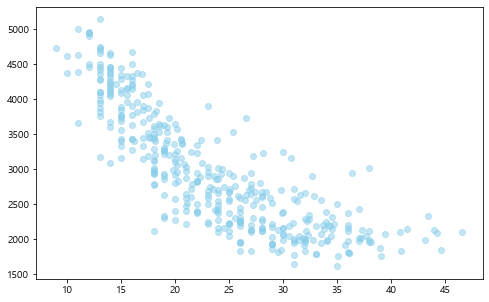

In [95]:
x = df_auto.mpg
y = df_auto.weight

plt.figure(figsize=(8, 5))
plt.scatter(x, y, color = 'skyblue', marker = 'o', alpha=0.5 )

In [96]:
df_auto.corr()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000


## plt histogram

(array([ 1.,  2.,  4.,  6.,  0., 20., 19., 17.,  5., 17.,  8., 25.,  7.,
        18., 15., 15.,  5., 13., 11., 17.,  4., 16., 15., 14.,  5., 13.,
         9., 12.,  3., 11., 12.,  8.,  5.,  9.,  4.,  7.,  3.,  5.,  6.,
         1.,  2.,  0.,  2.,  1.,  0.,  2.,  2.,  1.,  0.,  1.]),
 array([ 9.   ,  9.752, 10.504, 11.256, 12.008, 12.76 , 13.512, 14.264,
        15.016, 15.768, 16.52 , 17.272, 18.024, 18.776, 19.528, 20.28 ,
        21.032, 21.784, 22.536, 23.288, 24.04 , 24.792, 25.544, 26.296,
        27.048, 27.8  , 28.552, 29.304, 30.056, 30.808, 31.56 , 32.312,
        33.064, 33.816, 34.568, 35.32 , 36.072, 36.824, 37.576, 38.328,
        39.08 , 39.832, 40.584, 41.336, 42.088, 42.84 , 43.592, 44.344,
        45.096, 45.848, 46.6  ]),
 <BarContainer object of 50 artists>)

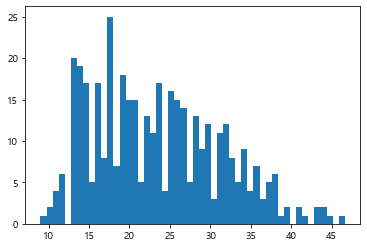

In [97]:
plt.hist(x, bins=50)

## df Box plot

<AxesSubplot:>

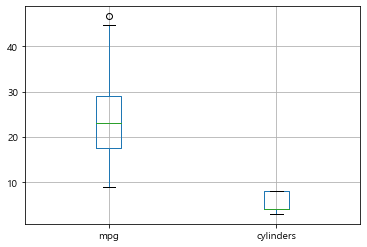

In [98]:
df_auto.boxplot(column=['mpg', 'cylinders'])

In [169]:
sns.set_style('darkgrid') #darkgrid, whitegrid, dark, white, ticks

In [170]:
import seaborn as sns

tips = pd.read_csv('./dataset/tips.csv')
print(tips.head(), '\n')

party_counts = pd.crosstab(tips['day'], tips['size'])
print(party_counts.head())

   total_bill   tip smoker  day    time  size
0       16.99  1.01     No  Sun  Dinner     2
1       10.34  1.66     No  Sun  Dinner     3
2       21.01  3.50     No  Sun  Dinner     3
3       23.68  3.31     No  Sun  Dinner     2
4       24.59  3.61     No  Sun  Dinner     4 

size  1   2   3   4  5  6
day                      
Fri   1  16   1   1  0  0
Sat   2  53  18  13  1  0
Sun   0  39  15  18  3  1
Thur  1  48   4   5  1  3


In [171]:
party_counts = party_counts.loc[:,2:5]

#normalize to sum to 1
party_pcts = party_counts.div(party_counts.sum(1), axis=0) # deviation
party_pcts.round(2)

size,2,3,4,5
day,,,,
Fri,0.89,0.06,0.06,0.00
Sat,0.62,0.21,0.15,0.01
Sun,0.52,0.20,0.24,0.04
Thur,0.83,0.07,0.09,0.02


In [172]:
type(party_pcts)

pandas.core.frame.DataFrame

In [173]:
# mark up?? (vs. margin)
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


## sns barplot

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

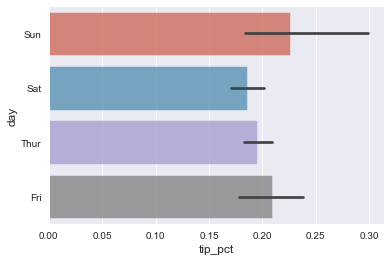

In [174]:
sns.barplot(x = 'tip_pct', y = 'day', data=tips,
           orient='h', alpha=0.7)

In [114]:
# 까만색은 신뢰구간이라고 한다 ?

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

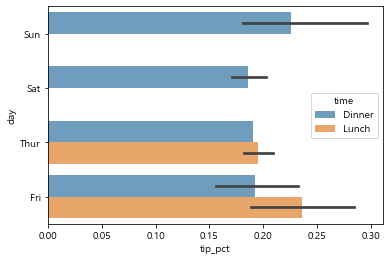

In [116]:
sns.barplot(x = 'tip_pct', y = 'day', hue = 'time', data=tips,
           orient='h', alpha=0.7)

## sns countplot

<AxesSubplot:xlabel='size', ylabel='count'>

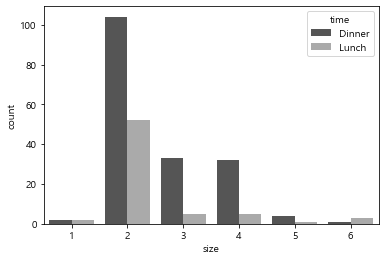

In [118]:
sns.countplot('size', hue='time', data=tips, palette='gray')

## (?) sns distplot: 뭔 밀도

In [126]:
fish_multi = pd.read_csv('./dataset/4_fm2.csv')
fish_multi.head()

,species,length
0,A,2
1,A,3
2,A,3
3,A,4
4,A,4


<AxesSubplot:xlabel='length', ylabel='Density'>

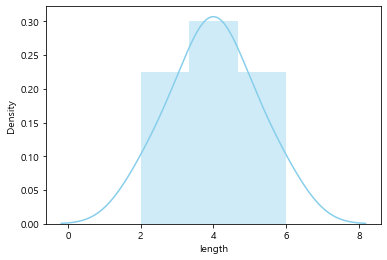

In [129]:
length_a = fish_multi.query('species == "A"')['length']
length_b = fish_multi.query('species == "B"')['length']
sns.distplot(length_a, color='skyblue')# kde=False) # kernal  density estimation


<AxesSubplot:xlabel='length'>

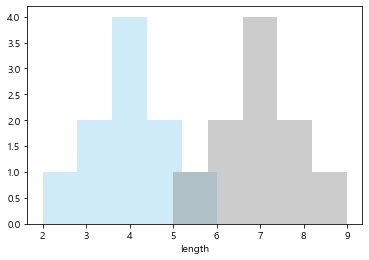

In [137]:
sns.distplot(length_a, bins=5, color='skyblue', kde=False) # kernal  density estimation
sns.distplot(length_b, bins=5, color='gray',  kde=False)

## sns boxplot

<AxesSubplot:xlabel='species', ylabel='length'>

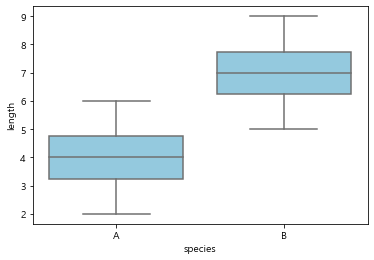

In [138]:
sns.boxplot(x='species', y='length', data=fish_multi, color='skyblue')

## sns violinplot

<AxesSubplot:xlabel='species', ylabel='length'>

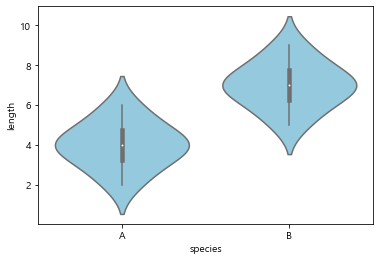

In [139]:
# 바이올린 플롯
# 상자대신 히스토그램을 세로로 세워서 배치한 상자 그림. 
# 어느 부분에 데이터가 집중되어 있는지 정보 추가
sns.violinplot(x='species', y='length', data=fish_multi, color='skyblue')

In [151]:
fish_multi.iloc[5, 1] = 10
fish_multi.iloc[10,1] = 2

<AxesSubplot:xlabel='species', ylabel='length'>

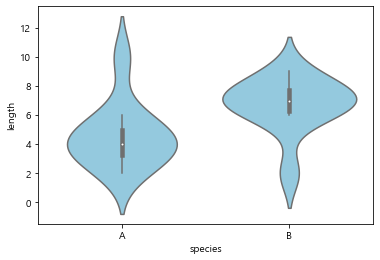

In [152]:
sns.violinplot(x='species', y='length', data=fish_multi, color='skyblue')

## sns.jointplot

In [149]:
cov_data = pd.read_csv('./dataset/4_cov.csv')
cov_data

,x,y
0,18.5,34
1,18.7,39
2,19.1,41
3,19.7,38
4,21.5,45
5,21.7,41
6,21.8,52
7,22.0,44
8,23.4,44
9,23.8,49


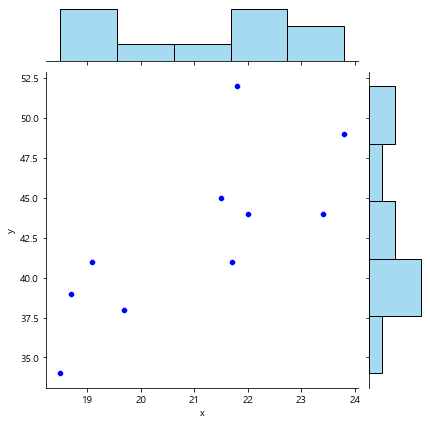

In [156]:
sns.jointplot(cov_data.x, cov_data.y,
             joint_kws = {'color':'blue'},
             marginal_kws={'color':'skyblue'})

## sns lmplot

In [157]:
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


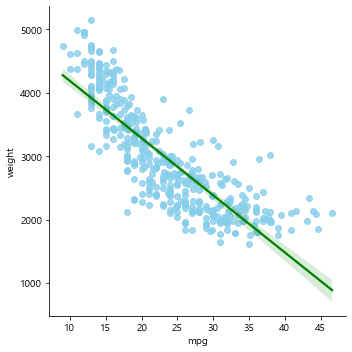

In [158]:
sns.lmplot(x='mpg', y='weight', data=df_auto, 
           scatter_kws={'color':'skyblue'}, 
           line_kws={'color':'green'})

## sns regplot

<AxesSubplot:xlabel='mpg', ylabel='weight'>

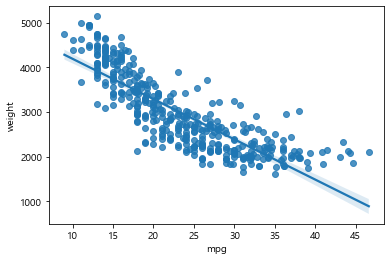

In [159]:
sns.regplot(x = 'mpg', y='weight', data=df_auto, fit_reg=True)

## sns pairplot

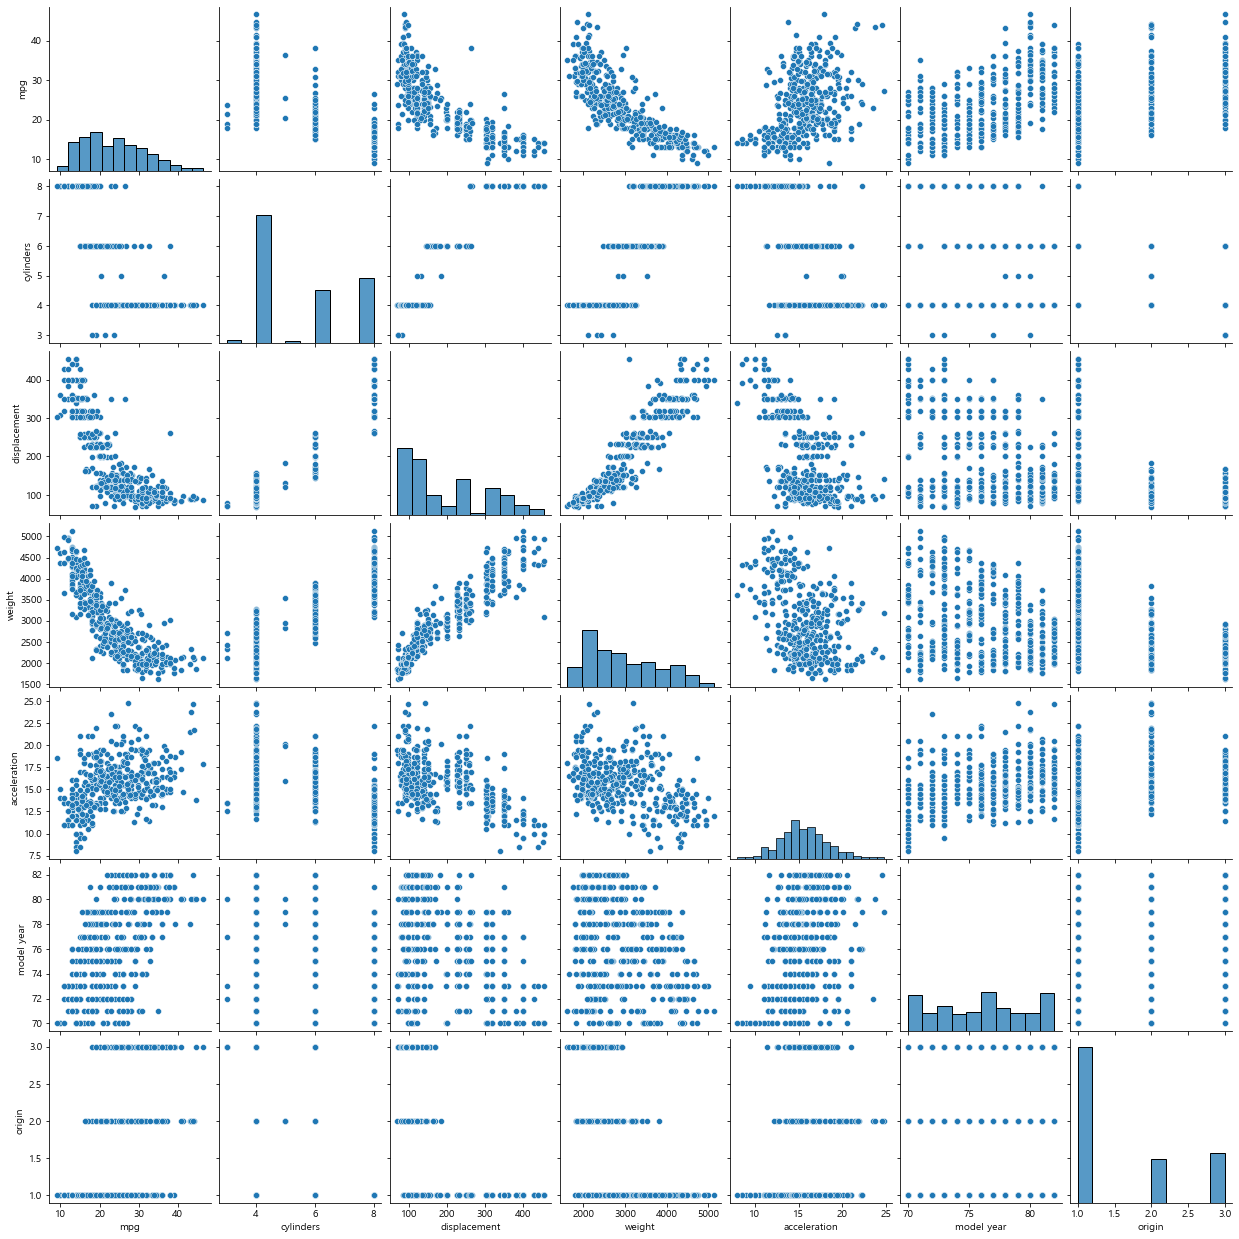

In [160]:
sns.pairplot(df_auto, palette='gray')

## sns heatmap

Text(0.5, 1.0, 'Heatmap of the Dataset')

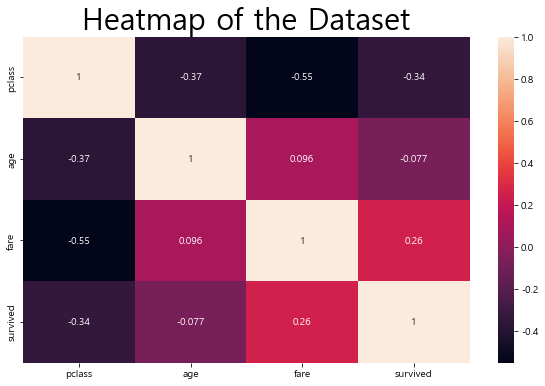

In [161]:
t_df = sns.load_dataset('titanic')

plt.figure(figsize=(10, 6))
sns.heatmap(t_df[['pclass', 'age', 'fare', 'survived']].corr(), annot=True)
plt.title('Heatmap of the Dataset', fontsize=30)

In [162]:
table = t_df.pivot_table(index=['sex'], columns=['class'], 
                         values=['survived'], aggfunc='mean')
table

survived                    
class      First    Second     Third
sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

<AxesSubplot:xlabel='None-class', ylabel='sex'>

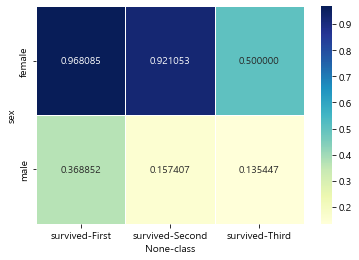

In [163]:
sns.heatmap(table,
           annot=True, fmt='f',
           cmap='YlGnBu',
           linewidth = .5,
           cbar=True)